In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as DT
CP = pd.read_excel("CP_2018_rain.xlsx")

index_list = list()
for i in range(1,len(CP.hour)):
    if CP.minute[i] != 51:
        index_list.append(i)
    
CP.drop(index_list,inplace=True)
#delete all records that are not made at 
#the 51min during each hour
CP.reset_index(drop=True, inplace=True)

In [3]:
len(CP)
#CP.tail()

4391

In [4]:
count_tsr= list()
count_MPN = list()
timer = list()
bacteria_MPN = list()
m = 0
n = 0
p=0

In [5]:
def rain_alg(i):
    return CP.PCP01[i-7:i].sum()

for i in range (7,len(CP)):
    n = CP.MPN[i]
    p=i/24
    if rain_alg(i)>0.25:
        m = 1
    else:
        m = m+1
    count_tsr.append(m)
    timer.append(p)
    count_MPN.append(n)

In [6]:
MPN = count_MPN
TSR = count_tsr
c={"MPN" : MPN,
   "TSR" : TSR}
summary=pd.DataFrame(c)


In [7]:
MPN_Filtered = summary[~pd.isnull(summary.MPN)]  

Text(0,0.5,'Most probabaly number')

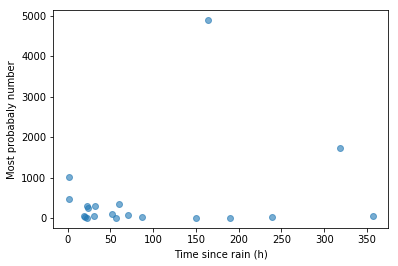

In [8]:
x = MPN_Filtered.TSR
y = MPN_Filtered.MPN
plt.scatter(x, y, alpha=0.6)  
plt.xlabel('Time since rain (h)')
plt.ylabel('Most probabaly number')
#plt.show()


Text(0.5,1,'CP 2018 Prediction Curve')

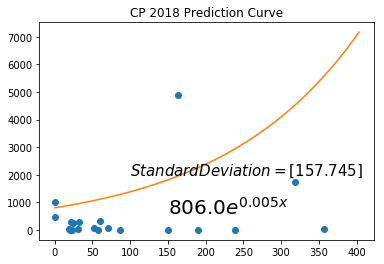

In [26]:
z,r,_,_,_ = np.polyfit(x, np.log(y), 1,w=np.sqrt(y),full=True)

xx = np.linspace(0,max(count_tsr),50)
yy = np.exp(z[1]+z[0]*xx)
rr = np.sqrt(r*2)
plt.plot(x,y,'o')
plt.plot(xx,yy,'-')
plt.text(150,600,r'${{{a}}}e^{{{{{b}}}x}}$'.format(a=np.around(np.exp(z[1])),decimals=3,b=np.around(z[0],decimals =3)),fontsize = 20)

plt.text(100,2000, r'$Standard Deviation={{{a}}}$'.format(a=np.around(rr,decimals=3)),fontsize=15)
plt.title("CP 2018 Prediction Curve")

Text(0.5,1,'CP 2018 Prediction Curve')

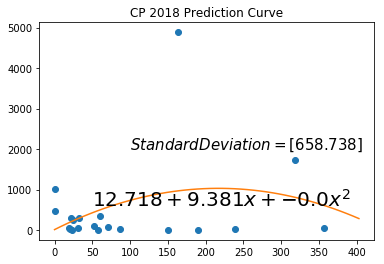

In [10]:
z,r,_,_,_ = np.polyfit(x,y, 2,full=True)

xx = np.linspace(0,max(count_tsr),50)
yy = z[2]+z[1]*xx+z[0]*xx*xx

rr = np.sqrt(r/50)

plt.plot(x,y,'o')
plt.plot(xx,yy,'-')
plt.text(50,600,r'${{{a}}} + {{{b}}}x + {{{c}}}x^2$'.format(a=np.around(z[2],decimals=3),b=np.around(z[1],decimals =3),c=np.around(z[0]),decimals =3),fontsize = 20)
plt.text(100,2000, r'$Standard Deviation={{{a}}}$'.format(a=np.around(rr,decimals=3)),fontsize=15)
plt.title("CP 2018 Prediction Curve")

In [11]:
len(xx)

50

Text(0.5,1,'CP 2018 Prediction Curve')

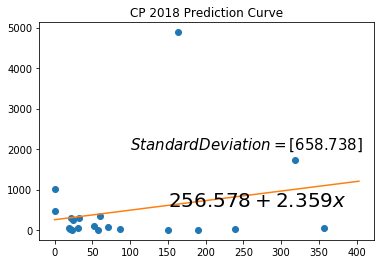

In [12]:
z = np.polyfit(x,y, 1)

xx = np.linspace(0,max(count_tsr),50)
yy = z[1]+z[0]*xx
rr = np.sqrt(r/50)

plt.plot(x,y,'o')
plt.plot(xx,yy,'-')
plt.text(150,600,r'${{{a}}} + {{{b}}}x$'.format(a=np.around(z[1],decimals=3),b=np.around(z[0],decimals =3)),fontsize = 20)
plt.text(100,2000, r'$Standard Deviation={{{a}}}$'.format(a=np.around(rr,decimals=3)),fontsize=15)
plt.title("CP 2018 Prediction Curve")


array([ 3.55628295e+02, -2.90345394e-03])

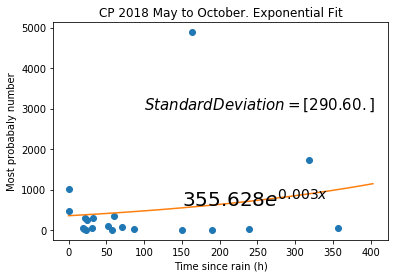

In [13]:
from matplotlib import pylab
from scipy.optimize import curve_fit

def exponenial_func(x, a, b):
    return a*np.exp(-b*x)

popt, pcov = curve_fit(exponenial_func, x, y)

xx = np.linspace(0, max(count_tsr), 50)
yy = exponenial_func(xx, *popt)

perr = np.sqrt(np.diag(pcov))

plt.plot(x,y,'o', xx, yy)
plt.text(150,600,r'${{{a}}}e^{{{{{b}}}x}}$'.format(a=np.around((popt[0]),decimals=3),b=-np.around((popt[1]),decimals =3)),fontsize = 20)
plt.text(100,3000, r'$Standard Deviation={{{a}}}$'.format(a=np.around(perr,decimals=1)),fontsize=15)
pylab.title('CP 2018 May to October. Exponential Fit')
plt.xlabel('Time since rain (h)')
plt.ylabel('Most probabaly number')

popt

In [14]:

#plt.plot(timer,bacteria_MPN,'-', markersize= 10)
#plt.ylim((400,700))

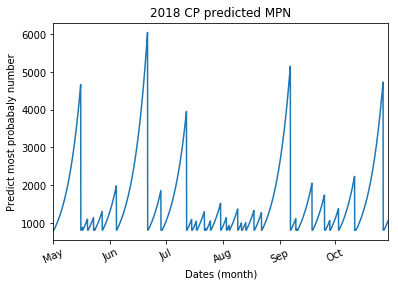

In [15]:
d0 = DT.datetime(1,1,1,0,0,0,0)
d1 = DT.datetime(2018,5,1,7,51,0,0)
dt = d1-d0

datenums = np.array(timer) 
#timer = index i / 24 (convert from hours to days unit)
dates = mdates.num2date(datenums+1 + dt.days)
bacteria_MPN = 806.0*np.exp(0.005*np.array(count_tsr))
#using the fitted curve equation for calculation

fig, ax = plt.subplots()
ax.plot(dates,bacteria_MPN , '-', markersize= 10)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=25)
#plt.ylim((0,350))
plt.xlim([DT.date(2018, 5, 1), DT.date(2018, 10, 30)])
plt.xlabel('Dates (month)')
plt.ylabel('Predict most probabaly number')
plt.title('2018 CP predicted MPN')
#ax.set_xticks(dates)
plt.show()

In [16]:
MPN_Filtered2 = summary[(summary.MPN<=1200)] 

In [17]:
x2 = MPN_Filtered2.TSR
y2 = MPN_Filtered2.MPN

Text(0,0.5,'Most probabaly number')

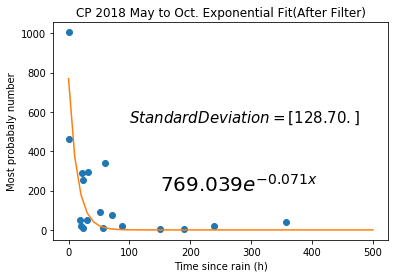

In [21]:
popt2, pcov2 = curve_fit(exponenial_func, x2, y2)

xx2 = np.linspace(0, 500, 50)
yy2 = exponenial_func(xx2, *popt2)
perr2 = np.sqrt(np.diag(pcov2))

plt.plot(x2,y2,'o', xx2, yy2)
plt.text(150,200,r'${{{a}}}e^{{{{{b}}}x}}$'.format(a=np.around((popt2[0]),decimals=3),b=-np.around((popt2[1]),decimals =3)),fontsize = 20)
#plt.text(15,4000,r'$1826.098e^{-0.051x}$',fontsize = 40)
plt.text(100,550, r'$Standard Deviation={{{a}}}$'.format(a=np.around(perr2,decimals=1)),fontsize=15)
pylab.title('CP 2018 May to Oct. Exponential Fit(After Filter)')
plt.xlabel('Time since rain (h)')
plt.ylabel('Most probabaly number')



In [22]:
bacteria_MPN2 = 769.039*np.exp(-0.071*np.array(count_tsr))

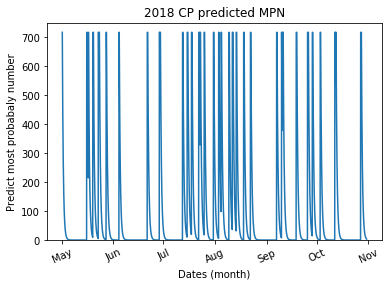

In [24]:
d0 = DT.datetime(1,1,1,0,0,0,0)
d1 = DT.datetime(2017,5,1,7,51,0,0)
dt = d1-d0

datenums = np.array(timer)

dates = mdates.num2date(datenums+1 + dt.days)
#print(dates)

#vals = np.random.randint(10, size=len(dates))
fig, ax = plt.subplots()
ax.plot(dates,bacteria_MPN2 , '-', markersize= 10)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=25)
plt.ylim((0,750))
plt.xlabel('Dates (month)')
plt.ylabel('Predict most probabaly number')
pylab.title('2018 CP predicted MPN')
#ax.set_xticks(dates)
plt.show()